<a href="https://colab.research.google.com/github/aish1508/aish1508/blob/main/R4_Time_Series_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series 
UMD MSIS Program, Data Visualization
 Professor  Lauren Rhue


## Load Libraries and data

Load the tidyverse and readxl libraries.

In [ ]:
# Load libraries and functions
library(tidyverse)
library(readxl)
library(scales)

se <- function(x){ sqrt(var(x, na.rm=T)/length(x))}

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




Read in the dataset. Remember that you'll need to load the dataset into the environment using the icon on the left. Upload the Excel spreadsheet into the environment and then run the code below.

In [ ]:
sales <- read_excel("supermarket_sales_upload_excel.xlsx")

## Chart 1: Groups over time 


We want to make a time series dataset first, so we group the columns by date and then calculate the number of transactions per date.

In [ ]:
daily_data <- sales %>%
  group_by(Date) %>%
  count() 

In [ ]:
daily_data

Date,n
<dttm>,<int>
2019-01-01,12
2019-01-02,8
2019-01-03,8
2019-01-04,6
2019-01-05,12
2019-01-06,9
2019-01-07,9
2019-01-08,18
2019-01-09,8


### Line charts

Line charts are used for time series data. 

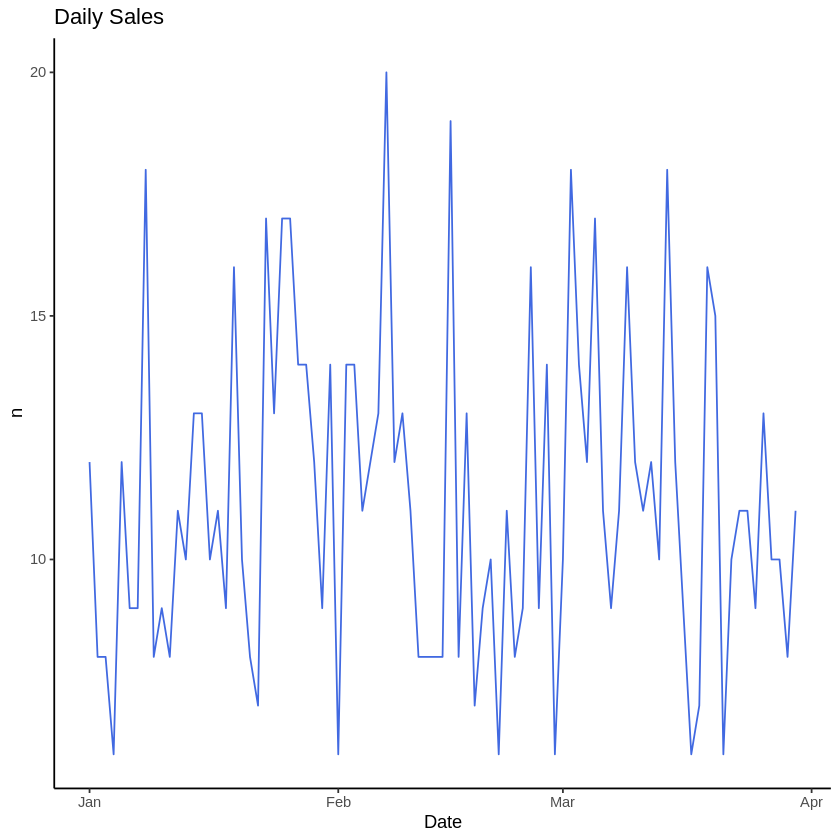

In [ ]:
l1 <- daily_data %>%
  ggplot(aes(x = Date,   y=n)) +
  #set line color and thickness 
  geom_line(color="royalblue", linewidth=0.5)   +
  ggtitle("Daily Sales") +
  theme_classic() 
  
l1

You can also add a reference line (a horizontal line) using the geom_hline() function.

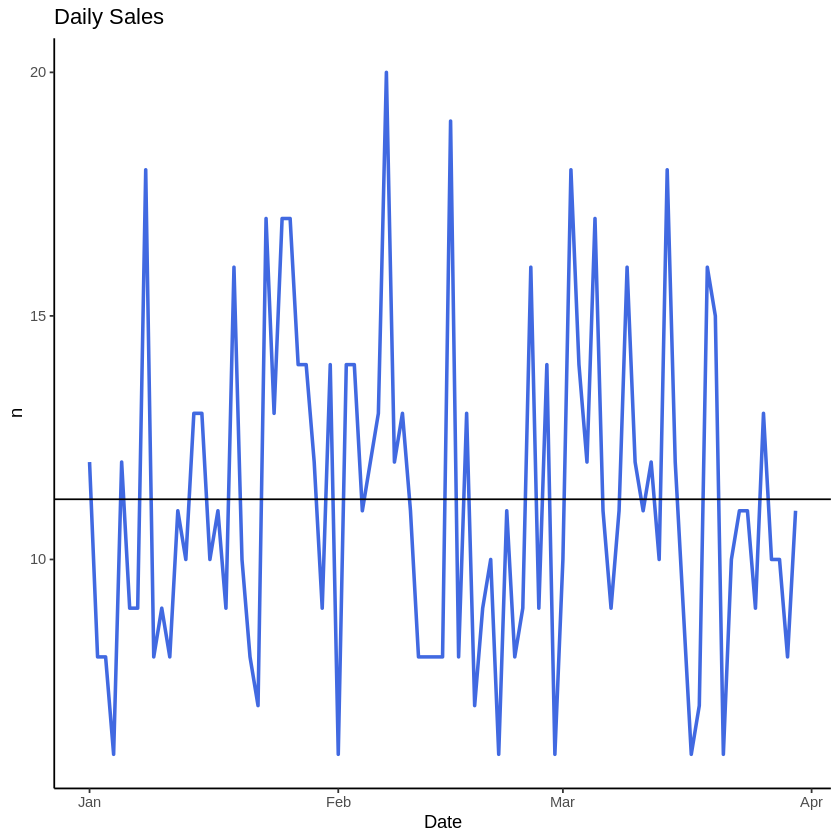

In [ ]:
mean_n <- mean(daily_data$n)

l1 <- daily_data %>%
  ggplot(aes(x = Date, y=n, group=1)) +
  #set line color and thickness 
  geom_line(color="royalblue", linewidth=1)   +
  geom_hline(yintercept = mean_n) +
  ggtitle("Daily Sales") +
  theme_classic()

l1

### Bar chart for time series data

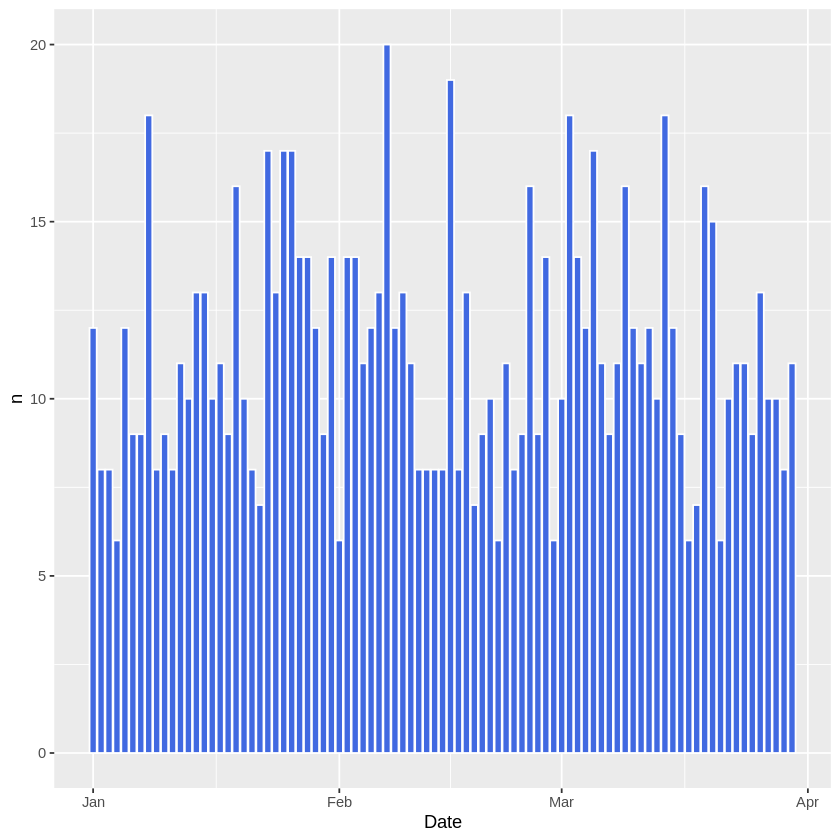

In [ ]:
b1 <- daily_data %>%
  ggplot(aes(x = Date,   y=n)) +
  geom_col(fill="royalblue", color="white") #change the bar colors and borders
b1 

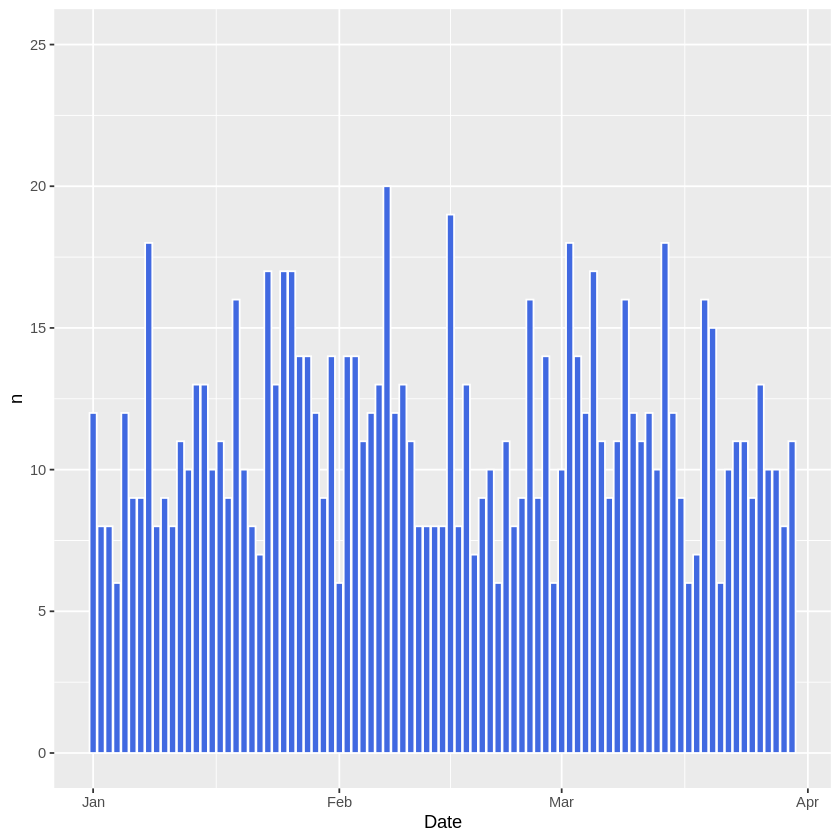

In [ ]:
#change the axis scales
b1 <- b1 +
  scale_y_continuous(breaks=seq(0, 25, by=5),
                     limits=c(0,25)) 
b1

Similar to the line chart, you can create a reference line with the geom_hline() function.

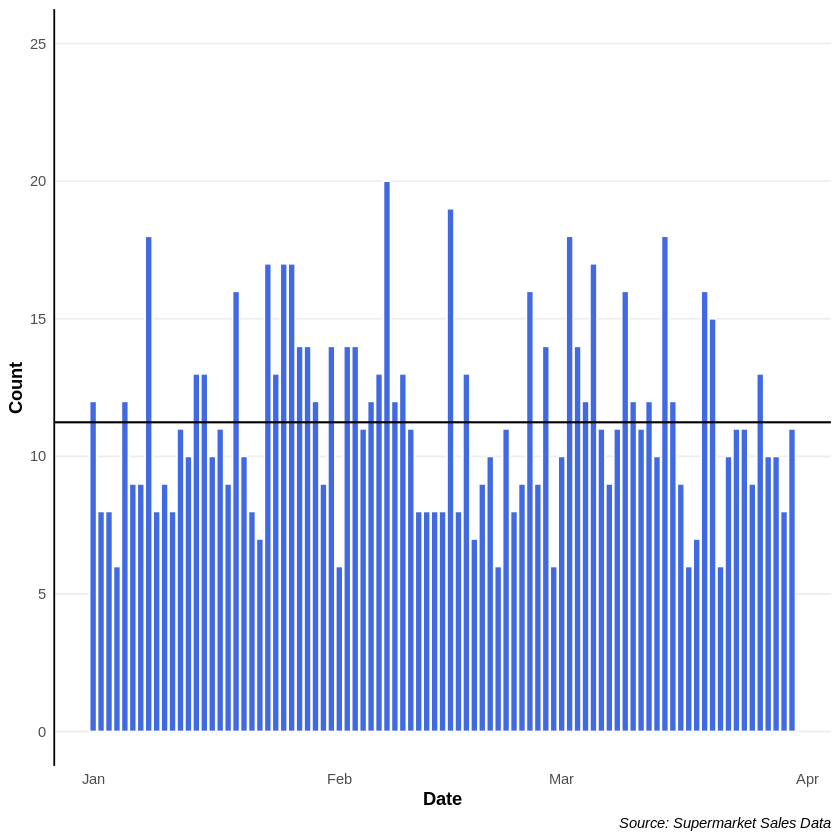

In [ ]:
#label the axes
b1 <- b1 + 
  labs(x = "Date", y="Count",
       caption="Source: Supermarket Sales Data") +
  geom_hline(yintercept = mean_n) 
b1

Note that the order matters. If you write the geom_hline() before the geom_col(), then the bars would written above the reference line.

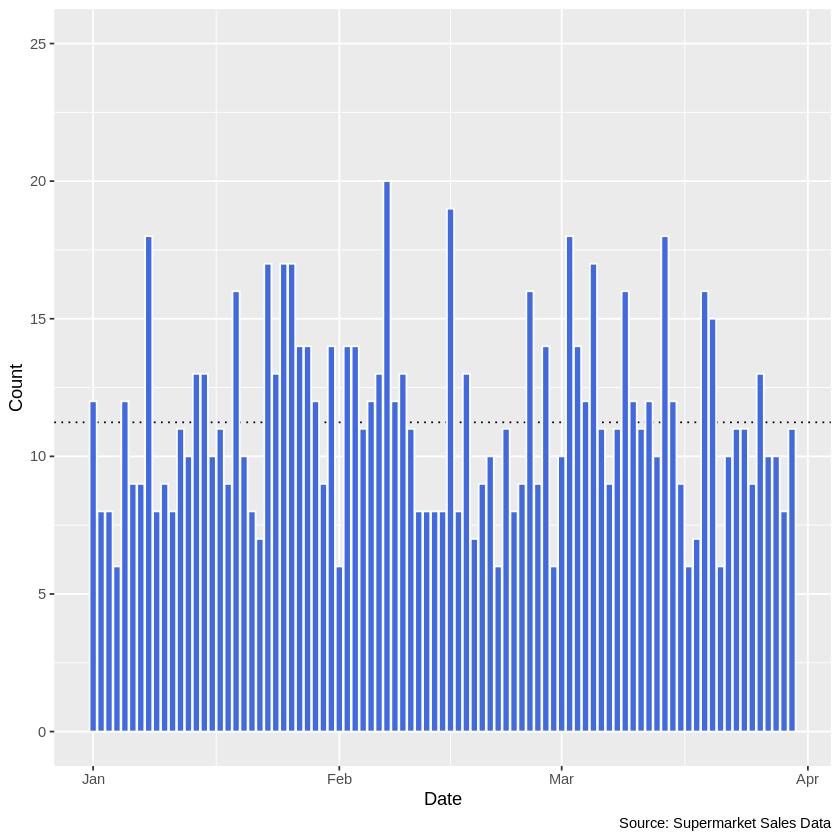

In [ ]:
 daily_data %>%
  ggplot(aes(x = Date,   y=n)) +
  geom_hline(yintercept = mean_n, linetype = 3)  +
  geom_col(fill="royalblue", color="white") + #change the bar colors and borders
  scale_y_continuous(breaks=seq(0, 25, by=5), limits=c(0,25))  + 
  labs(x = "Date", y="Count", caption="Source: Supermarket Sales Data")
  

Now that we have determine the content, we can improve the formatting with theme().

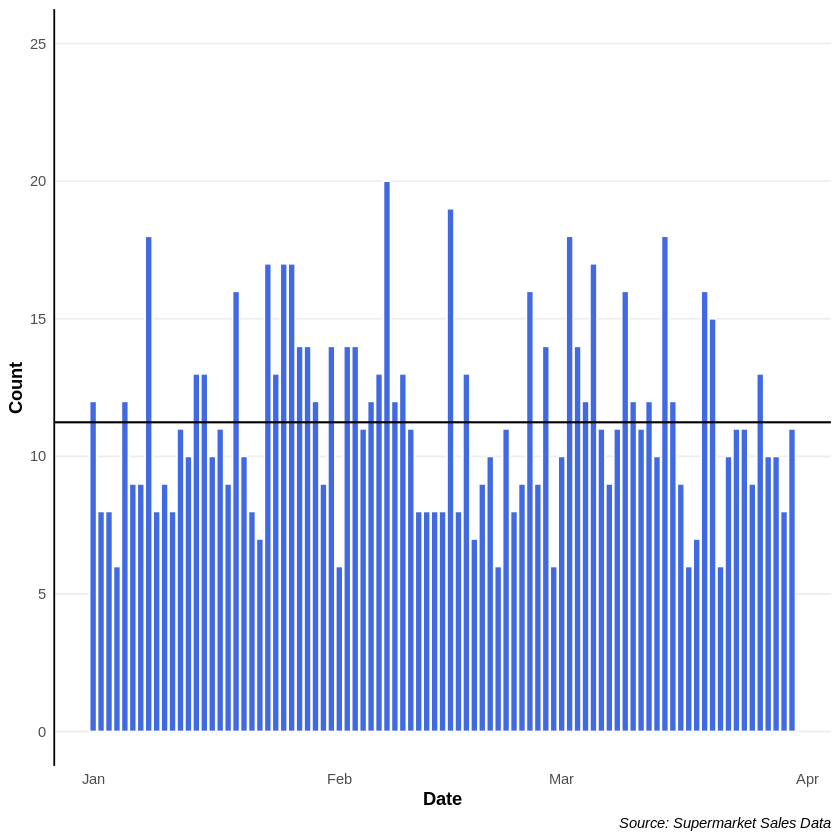

In [ ]:
#change the color scheme
b1 <- b1 +
  theme(legend.position = "bottom",
        axis.ticks = element_blank(),
        plot.title = element_text(size=18, hjust=0.5),
        panel.border = element_blank(),
        panel.background = element_rect(fill="white"),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_line(color="grey93"),
        panel.grid.major.x = element_blank(),
        axis.title = element_text(face="bold"),
        axis.line.y = element_line(color="black"),
        plot.caption = element_text(face="italic"))
b1

#Why doesnt chart q2 get a trendline? Would it be appropriate to add one?


## Chart 2: Changing the time frame 

Now let's say that we want to group the data by a different unit of time, not by day. We would have to create that unit of time from the date, group by that unit of time, and then calculate the transaction count.

In [ ]:
input_data <- sales %>%
  mutate(Year = format(Date, format="%Y"),
         Month = format(Date, format="%m-%Y"),
         Week = format(Date, format="%W")) %>%
  group_by(Week) %>%
  count()

head(input_data)

Week,n
<chr>,<int>
00,55
01,73
02,82
03,93
04,83
05,92


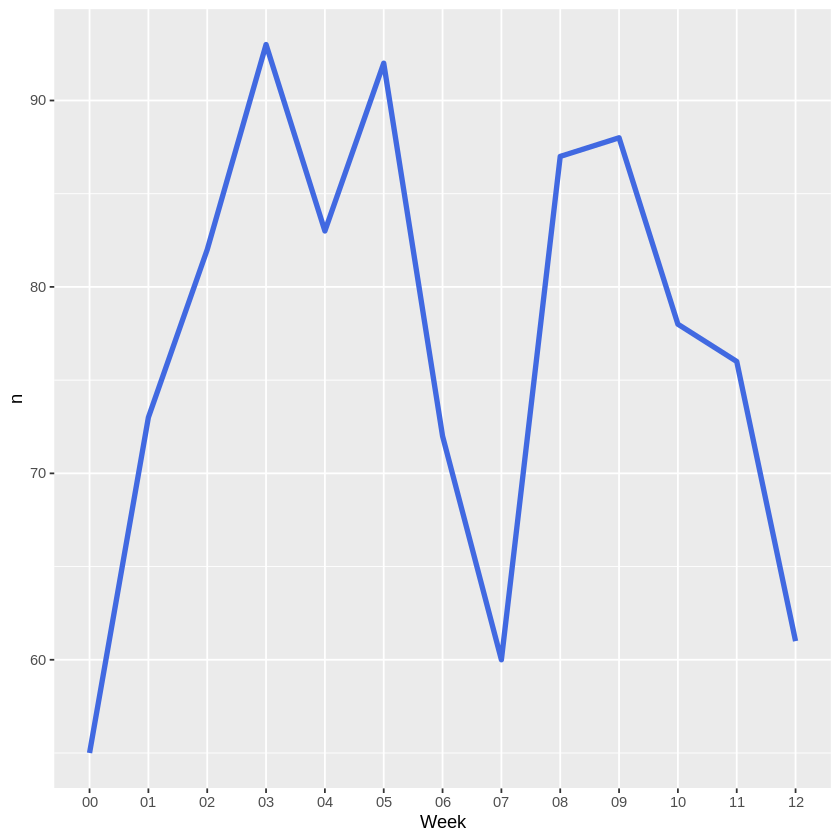

In [ ]:
q2 <- input_data %>%
  ggplot(aes(x = Week,   y=n, group=1)) +
  geom_line(color="royalblue", linewidth=1.5)  #set line color and thickness 
q2

We build on the line chart by changing the y-axis.

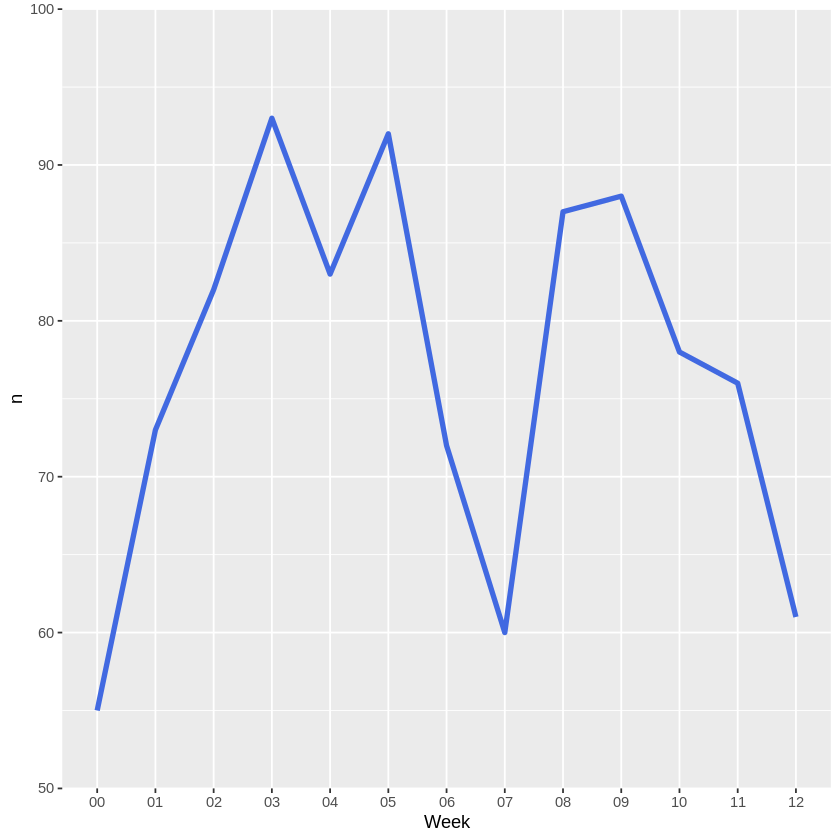

In [ ]:
#change the scales of the axes
q2 <- q2 +
  scale_y_continuous(breaks=seq(50, 100, by=10),
                     limits=c(50,100),
                     expand=c(0,0)) 
q2

We continue to build on this chart by changing the labels and adding a reference line.

`geom_smooth()` using formula = 'y ~ x'


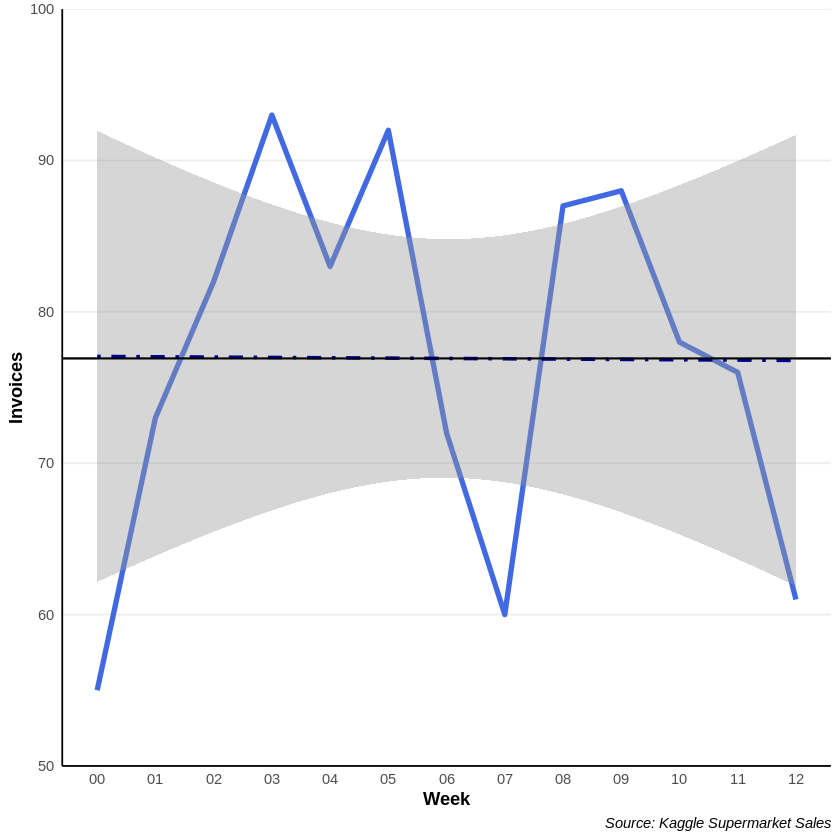

In [ ]:
#change the labels and the caption
q2 <- q2 +
  labs(x = "Week", y="Invoices", caption="Source: Kaggle Supermarket Sales") +
  geom_hline(yintercept = mean(input_data$n, na.rm=T)) #why do we add this hline?
q2

We can change the color scheme using the theme() function. 

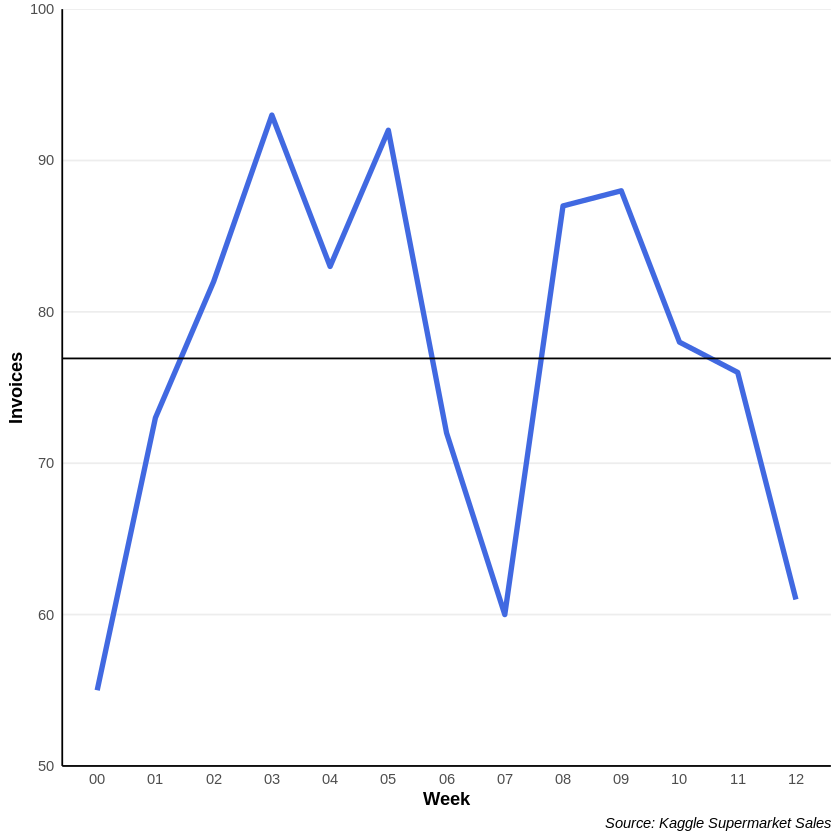

In [ ]:
#change the color scheme
q2 <- q2 +
  theme(axis.ticks = element_blank(),
        plot.title = element_text(size=18, hjust=0.5),
        panel.border = element_blank(),
        panel.background = element_rect(fill="white"),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_line(color="grey93"),
        panel.grid.major.x = element_blank(),
        axis.title = element_text(face="bold"),
        axis.line = element_line(color="black"),
        plot.caption = element_text(face="italic"))
q2

Lastly, we add a trendline.

`geom_smooth()` using formula = 'y ~ x'


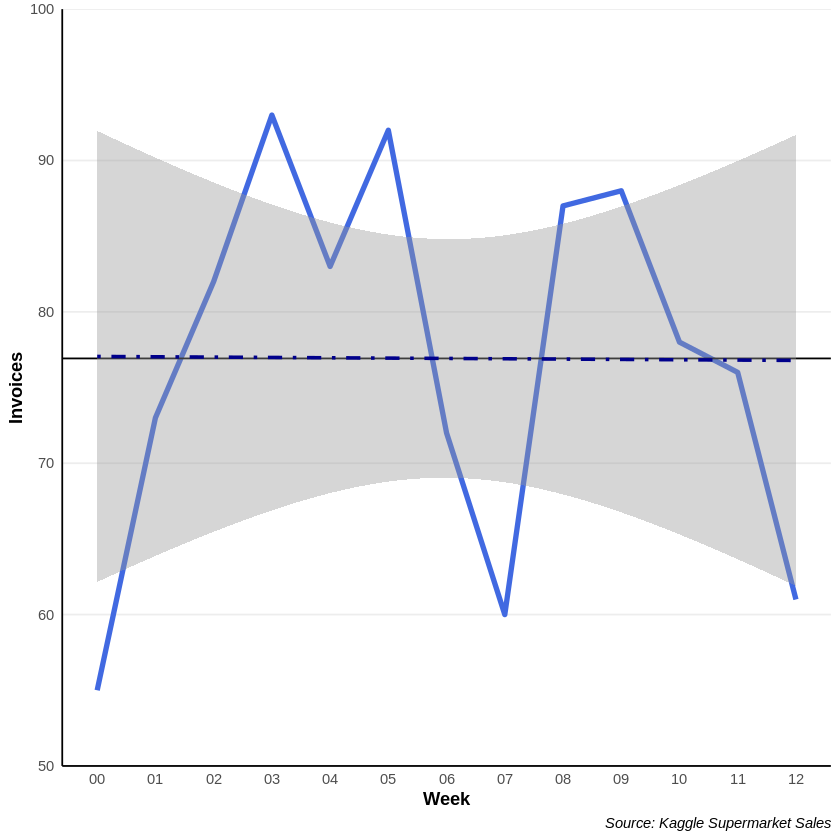

In [ ]:
#add a trendline
q2 <- q2 + 
  geom_smooth(method="lm", se=TRUE, color="darkblue",linetype=4) #change the line color and type
q2

Create a linechart using month year

Month,n
<chr>,<int>
01-2019,352
02-2019,303
03-2019,345


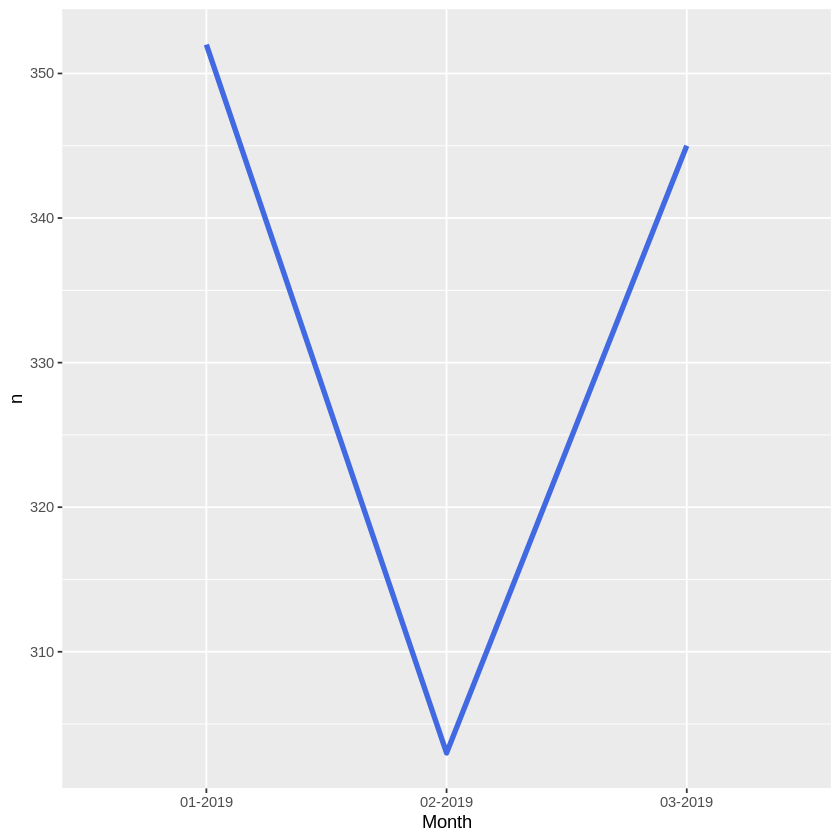

In [ ]:
month_data <- sales %>%
  
 mutate(Year = format(Date, format="%Y"),
         Month = format(Date, format="%m-%Y"),
         Week = format(Date, format="%W")) %>%
  group_by(Month) %>%
  count()
  
  month_data

  month_data%>%
  ggplot(aes(x = Month,   y=n, group = 1)) +
  #set line color and thickness 
  geom_line(color="royalblue", linewidth=1.5)   

## Chart 3: Area charts of Customer Type


We create a dataset for the chart by selecting the variables of interest to make the dataset easier to work with. After that, we group by the date and customer type and then calculate the sum of sales for each date and customer type.

In [ ]:
#use pivot_longer() to get the data in the correct format
q3_data <- sales  %>%
  select(Date, Total, `Customer type`) 

q3_data<- q3_data %>%
  group_by(Date, `Customer type`) %>%
  summarise(sum_sales = sum(Total)) %>% 
  ungroup()

`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


In [ ]:
#create the most basic area chart
q3 <- q3_data %>%
  ggplot(aes(x=Date, y=sum_sales, group=`Customer type`)) +
  geom_area(aes(fill=`Customer type`))
q3

We need to improve the format of this chart.

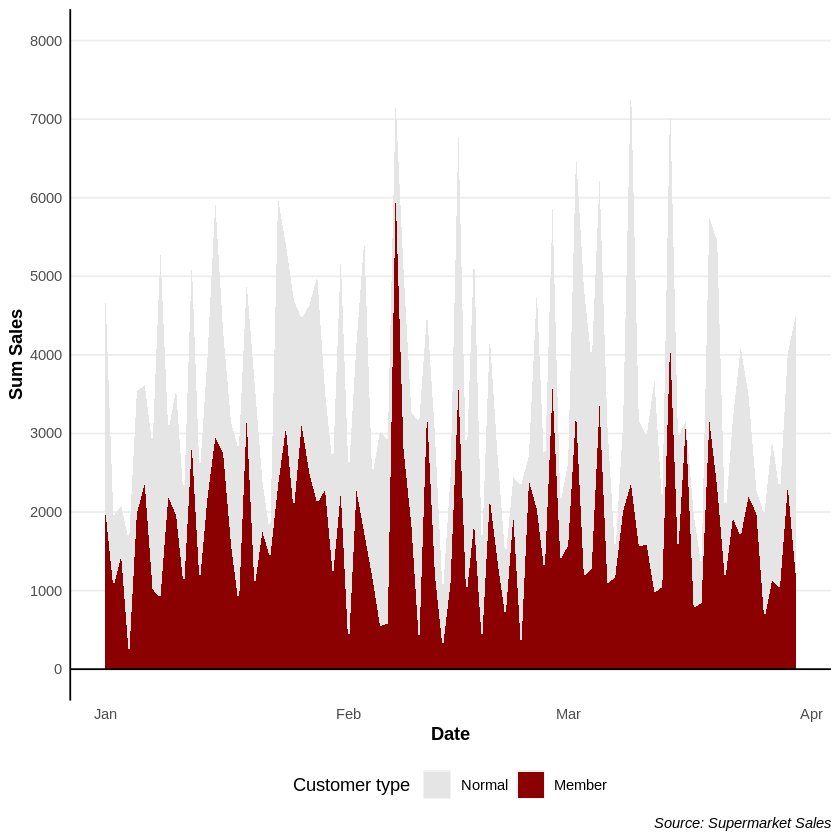

In [ ]:
#improve the chart
q3 + 
  scale_y_continuous(breaks=seq(0, 8000, by=1000),
                     limits=c(0,8000)) +
  labs(x = "Date", y="Sum Sales",
       caption="Source: Supermarket Sales") +
  geom_hline(yintercept = 0) +
  theme(legend.position = "bottom",
        axis.ticks = element_blank(),
        plot.title = element_text(size=18, hjust=0.5),
        panel.border = element_blank(),
        panel.background = element_rect(fill="white"),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_line(color="grey93"),
        panel.grid.major.x = element_blank(),
        axis.title = element_text(face="bold"),
        axis.line.y = element_line(color="black"),
        plot.caption = element_text(face="italic")) + 
  scale_fill_manual(labels = c("Normal", "Member"),
                    values = c('gray90', 'darkred'))


Stacked Bar chart

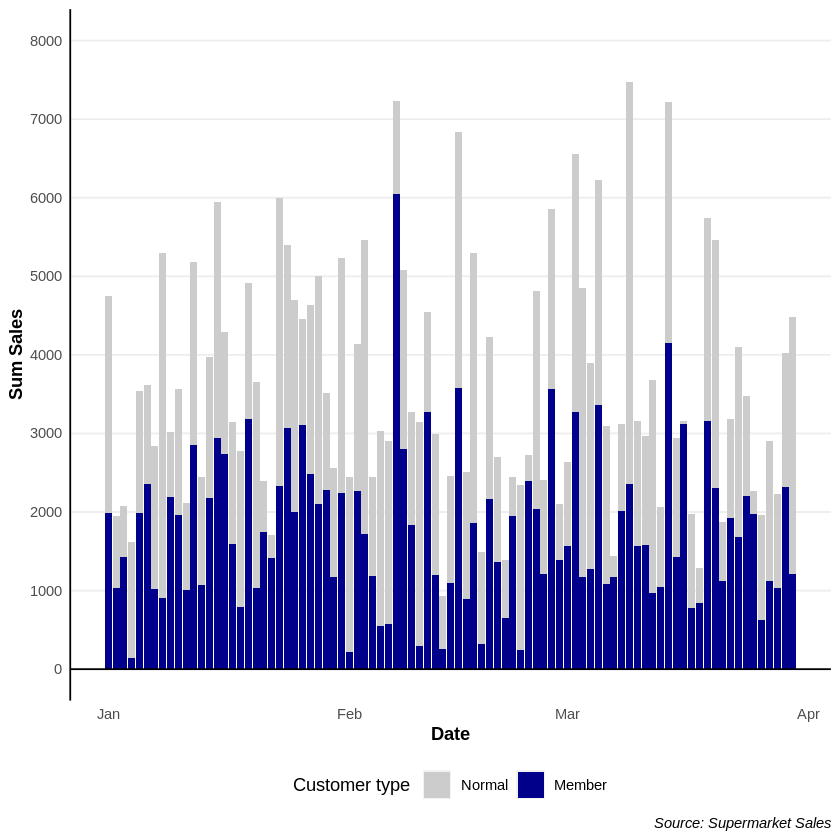

In [ ]:
q3_data %>%
  ggplot(aes(x=Date, y=sum_sales, group=`Customer type`)) +
  geom_col(aes(fill=`Customer type`)) +
  scale_y_continuous(breaks=seq(0, 8000, by=1000),
                     limits=c(0,8000)) +
  labs(x = "Date", y="Sum Sales",
       caption="Source: Supermarket Sales") +
  geom_hline(yintercept = 0) +
  theme(legend.position = "bottom",
        axis.ticks = element_blank(),
        plot.title = element_text(size=18, hjust=0.5),
        panel.border = element_blank(),
        panel.background = element_rect(fill="white"),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_line(color="grey93"),
        panel.grid.major.x = element_blank(),
        axis.title = element_text(face="bold"),
        axis.line.y = element_line(color="black"),
        plot.caption = element_text(face="italic")) + 
  scale_fill_manual(labels = c("Normal", "Member"),
                    values = c('gray80', 'darkblue'))

### Proportional chart
We need a different dataset to make a proportional area chart. A proportional area chart has the sales normalized and in percent form.

In [ ]:
#create a proportional area chart instead
q3b_data <- q3_data %>%
  pivot_wider(id_cols="Date", names_from = `Customer type`, values_from = `sum_sales`) %>% 
  mutate(NormalSales = Normal/(Normal + `Member`),
         MemberSales = Member/(Normal + `Member`)) %>% 
  select(Date, MemberSales, NormalSales) %>% 
  pivot_longer(cols = c(MemberSales, NormalSales), names_to = "PercentSales")   


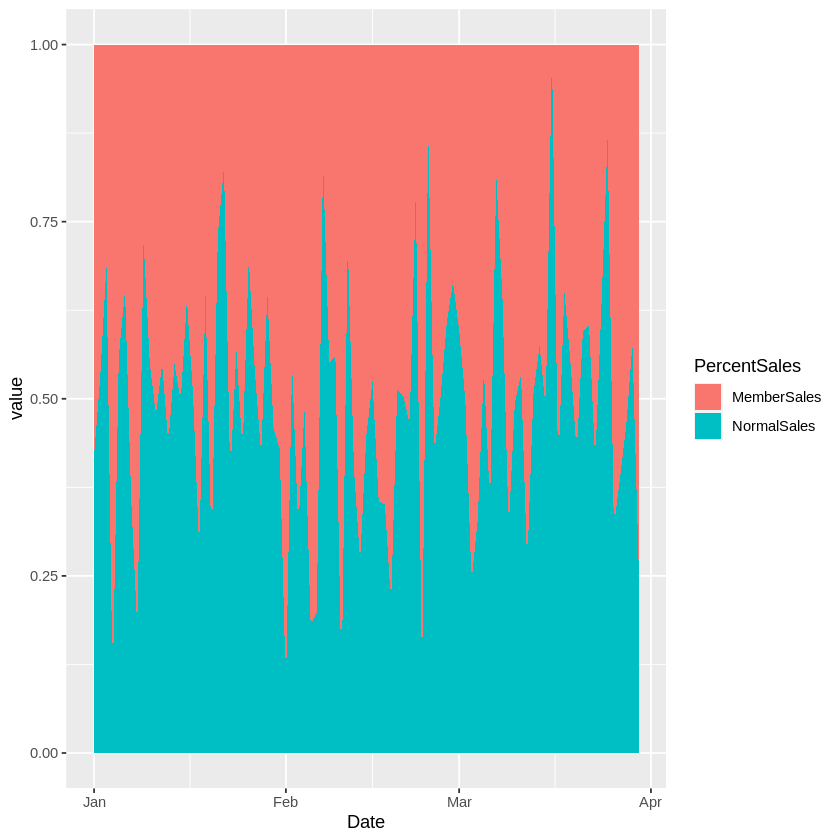

In [ ]:
#make the same chart
q3b <- q3b_data %>%
  ggplot(aes(x=Date, y=value, group=PercentSales)) +
  geom_area(aes(fill=PercentSales))
q3b

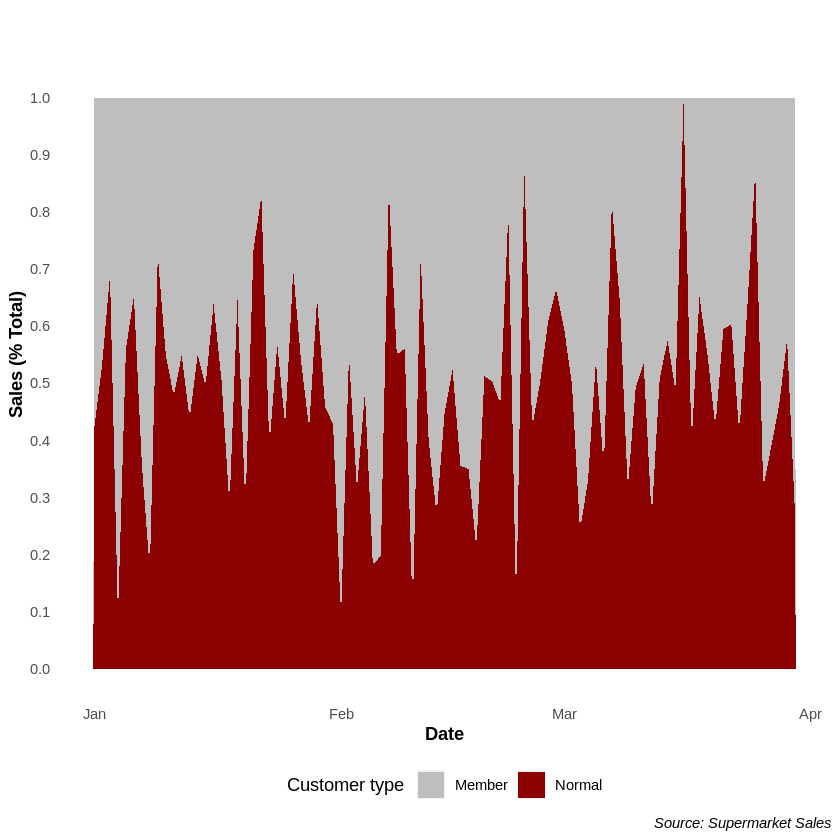

In [ ]:
q3b + 
  scale_y_continuous(breaks=seq(0, 1, by=0.1),
                     limits=c(0,1.1)) +
  labs(x = "Date", y="Sales (% Total)",
       caption="Source: Supermarket Sales") +
  theme(legend.position = "bottom",
        axis.ticks = element_blank(),
        plot.title = element_text(size=18, hjust=0.5),
        panel.border = element_blank(),
        panel.background = element_rect(fill="white"),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        axis.title = element_text(face="bold"),
        axis.line = element_blank(),
        axis.line.x = element_blank(),
        plot.caption = element_text(face="italic")) + 
  scale_fill_manual(name="Customer type",
                    labels = c("Member", "Normal"),
                    breaks = c("MemberSales", "NormalSales"),
                    values = c('gray', 'darkred'))


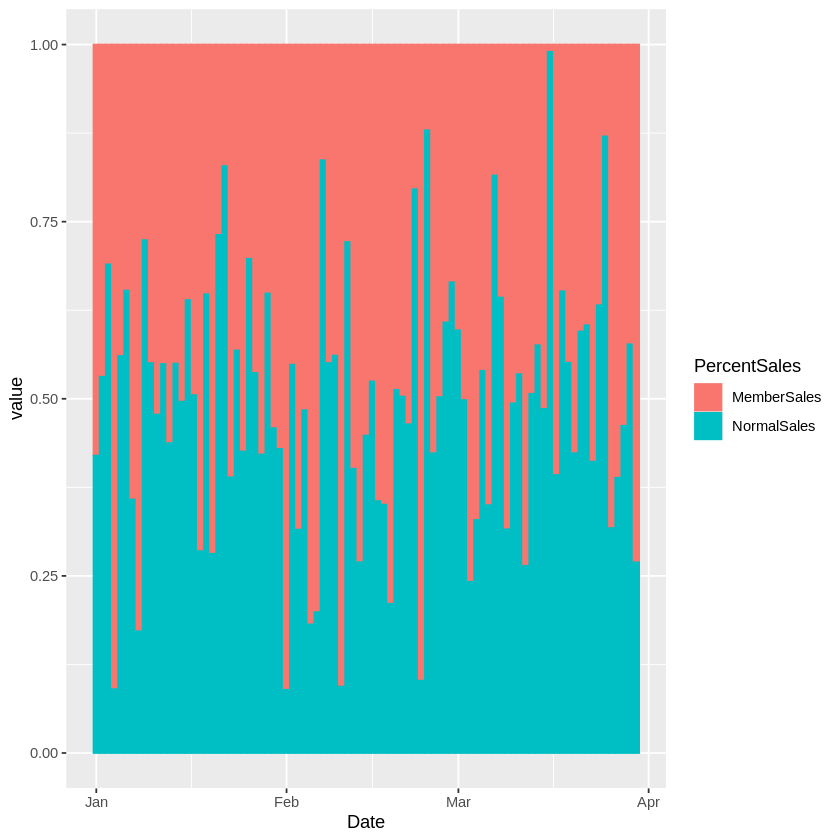

In [ ]:
#make the same chart
q3c <-q3b_data %>%
  ggplot(aes(x=Date, y=value, group=PercentSales)) +
  geom_col(aes(fill=PercentSales, color=PercentSales))
q3c

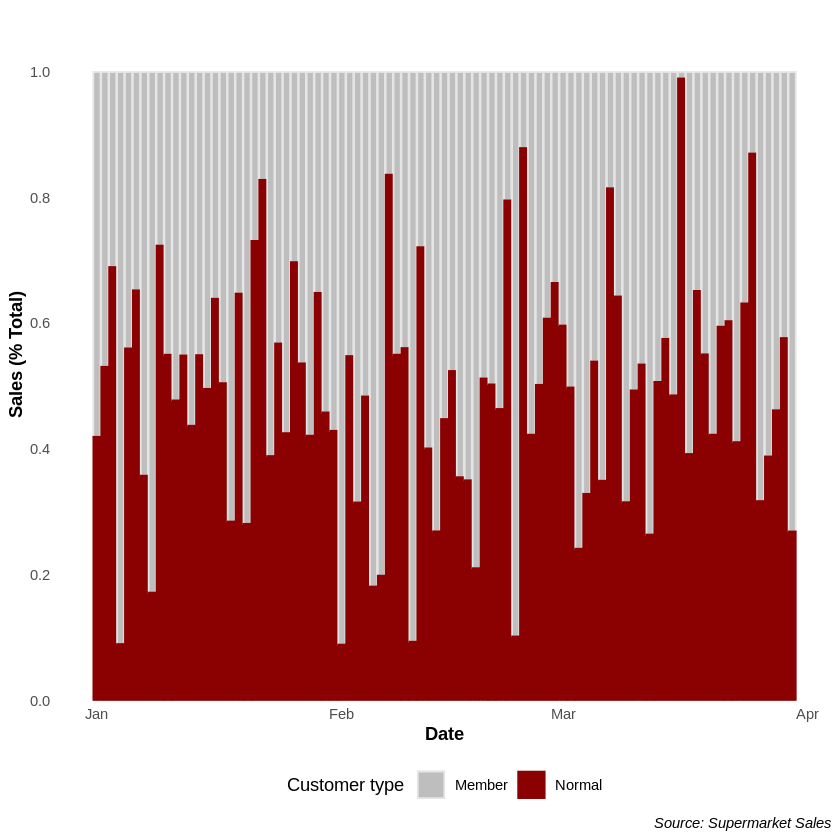

In [ ]:
q3c + 
   scale_y_continuous(breaks=seq(0, 1, by=0.2),
                      expand = c(0, 0),
                     limits=c(0,1.1)) +
  labs(x = "Date", y="Sales (% Total)",
       caption="Source: Supermarket Sales") +
  theme(legend.position = "bottom",
        axis.ticks = element_blank(),
        plot.title = element_text(size=18, hjust=0.5),
        panel.border = element_blank(),
        panel.background = element_rect(fill="white"),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        axis.title = element_text(face="bold"),
        axis.line = element_blank(),
        axis.line.x = element_blank(),
        plot.caption = element_text(face="italic")) + 
  scale_fill_manual(name="Customer type",
                    labels = c("Member", "Normal"),
                    breaks = c("MemberSales", "NormalSales"),
                    values = c('gray', 'darkred')) +
  scale_color_manual(name="Customer type",
                    labels = c("Member", "Normal"),
                    breaks = c("MemberSales", "NormalSales"),
                    values = c('gray90', 'darkred'))
ggsave("wide_bar.png", width=6, height = 4)

## Chart 4: Average Sales for Cash Invoices

We are going to make a dataset for the time series of mean and sum of Sales. We once again create new columns with the time series data and calculate the number of transactions. 

In [ ]:
q4_data <- sales %>%
  mutate(Month = format(Date, format="%m-%Y"),
         Week = format(Date, format="%W")) %>%
  group_by(Week, Payment) %>%
  summarise(n = n(),
            mean_sales = mean(Total),
            sum_sales = sum(Total), .groups="drop")

### Stacked Bar Chart

Next, we'll make a stacked bar chart. The fill= argument lets us vary the fill of the bars by a categorical variable. 

Is the chart below appropriate? Why or why not?

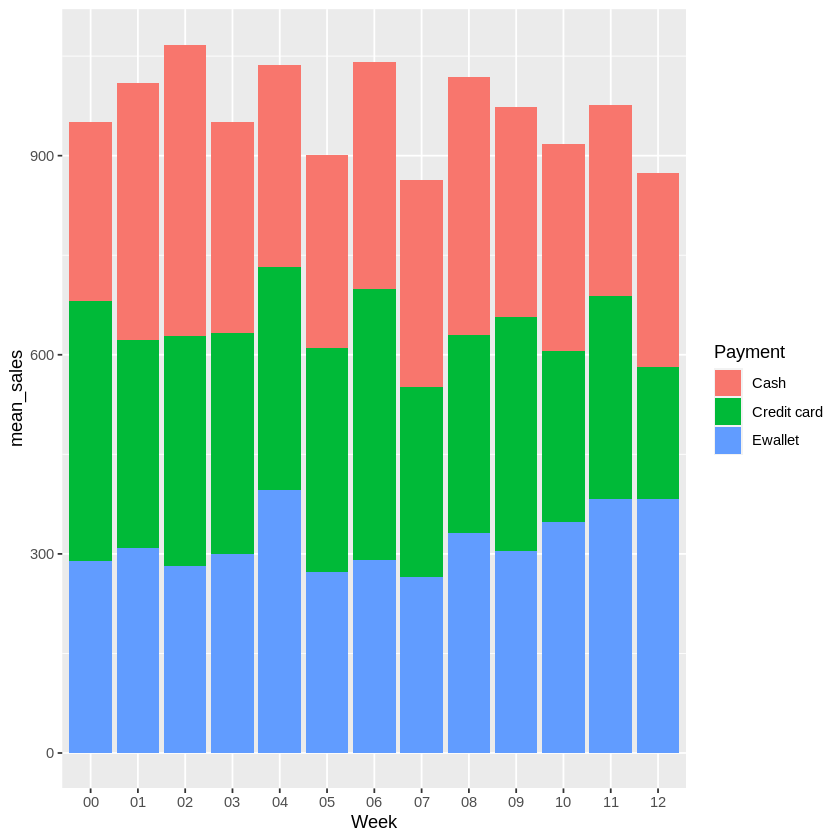

In [ ]:
q4_data %>%
  ggplot(aes(x=Week, y=mean_sales, fill=Payment)) +
  geom_col() # is this appropriate? why or why not?


We should not aggregate/stack means. Here's a better version (with sum of Sales).

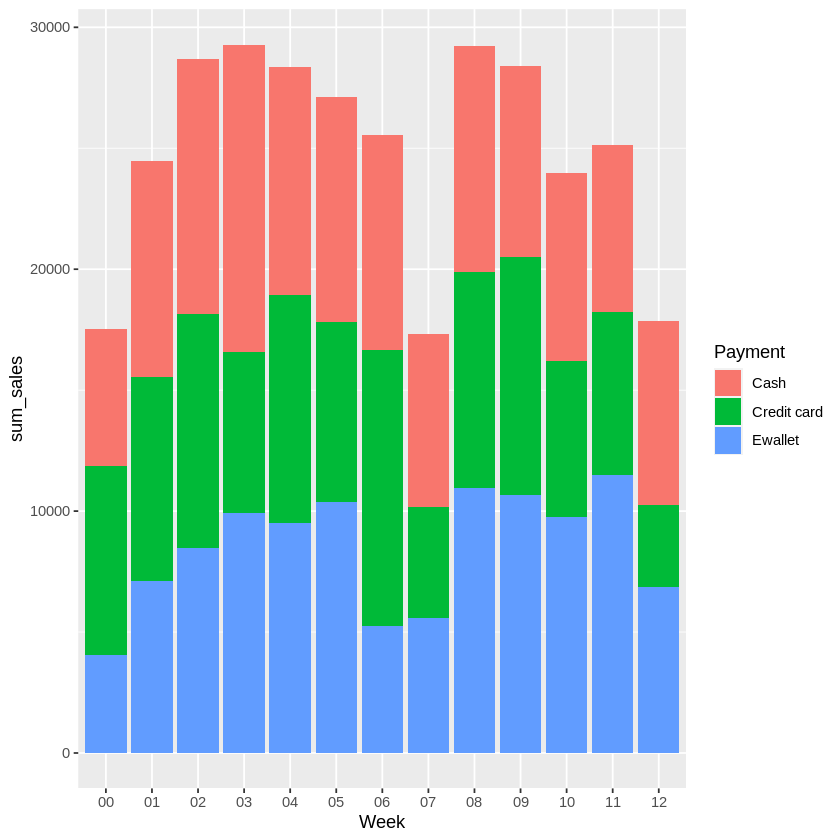

In [ ]:
q4_data %>%
  ggplot(aes(x=Week, y=sum_sales, fill=Payment)) +
  geom_col() 

### Multiple Line charts

To make a multiple line chart, you would add the color= argument to vary the color of the lines by a categorical variable. 

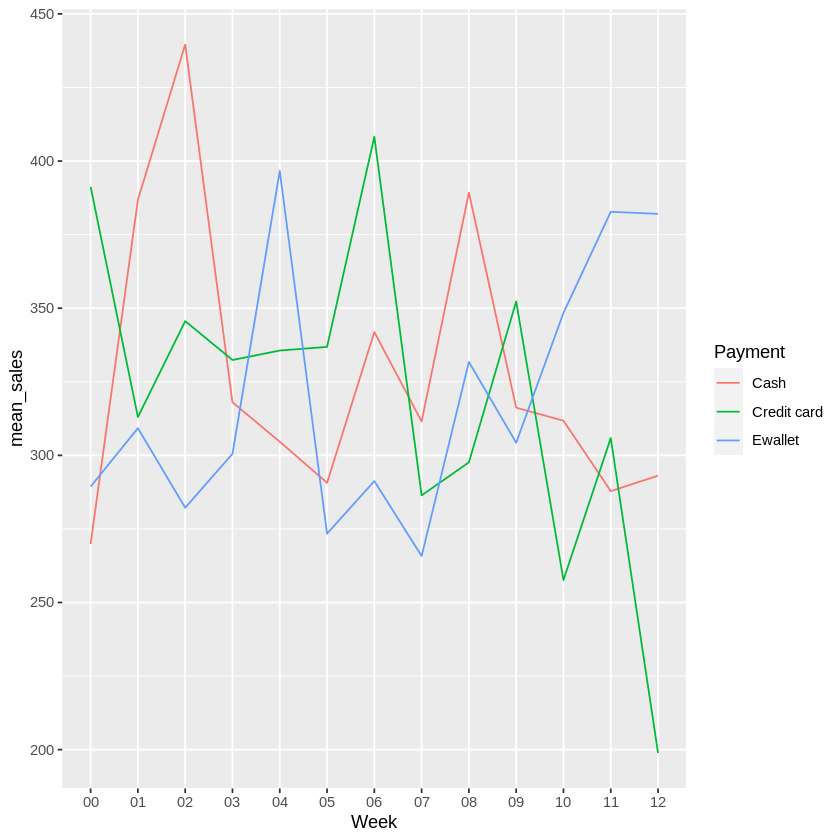

In [ ]:
q4_data %>%
  ggplot(aes(x=Week, y=mean_sales, group=Payment)) +
  geom_line(aes(color=Payment))

You can improve the formatting of the chart with the theme() argument, as we've done above. If you want to try it yourself, there is room below.

### Side-by-Side Bar Chart

To make a multiple line chart, you would add the fill= argument to vary the fill of the bars by a categorical variable. The position=dodge argument moves the bars from being stacked on top of each other to being side-by-side.

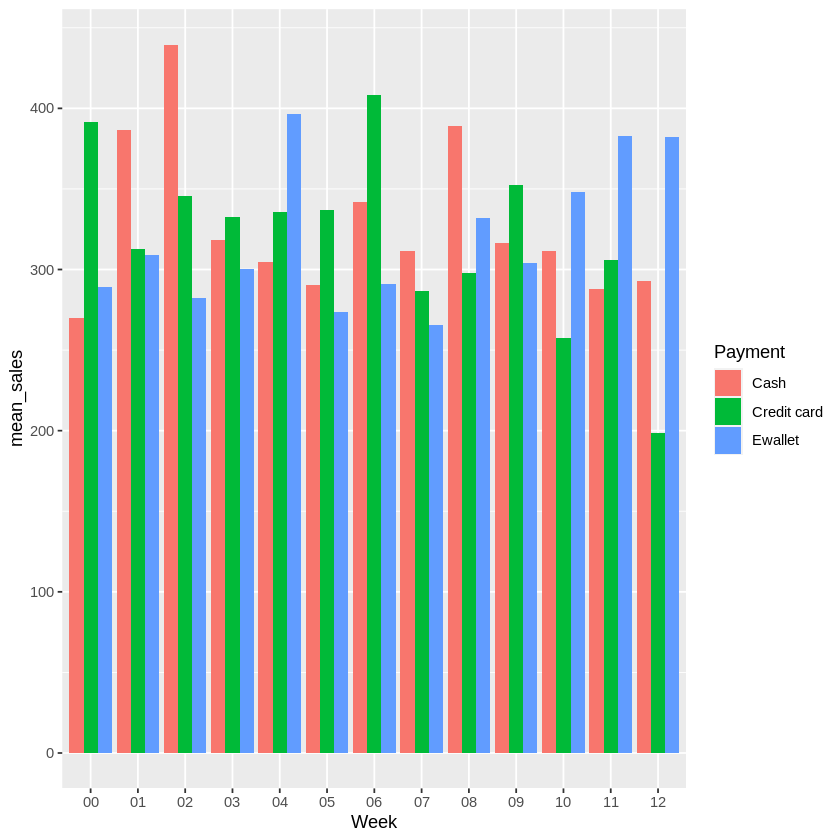

In [ ]:
cluster <- q4_data %>%
  ggplot(aes(x=Week, y=mean_sales, fill=Payment)) +
  geom_col(position="dodge")


Change the formats of the clustered bar chart 

### Heat Map

For our heat map, we are creating a new dataset with the weeks on one axis and the months on the other axis.

In [ ]:
q4_weekly_data <- sales %>%
  mutate(Month = format(Date, format="%m"),
         Week = format(Date, format="%W"),
         WeekMonth = as.numeric(Week)-(as.numeric(Month)-1)*4) %>%
  group_by(WeekMonth, Month, Payment) %>%
  summarise(n = n(),
            mean_sales = mean(Total),
            sum_sales = sum(Total))


`summarise()` has grouped output by 'WeekMonth', 'Month'. You can override
using the `.groups` argument.


We use the geom_tile() function to create the tile squares for the heat map. The color in the tiles are varied by the value in the fill= argument. The scale_fill_gradient() function allows you to choose the color for low values and high values of the fill= variable.

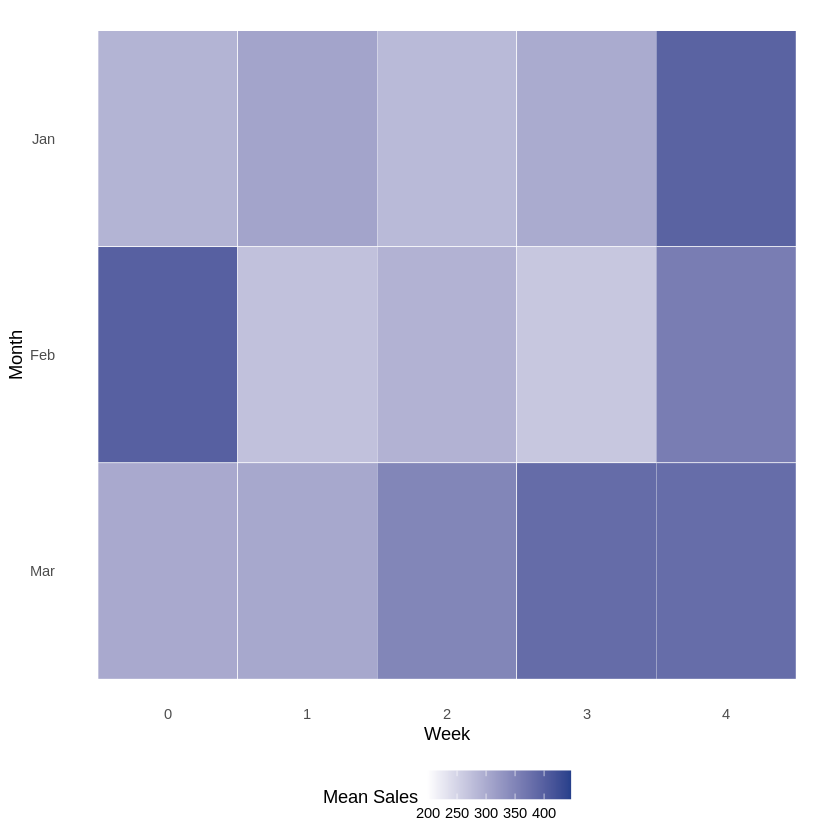

In [ ]:
q4_weekly_data %>%
  ggplot(aes(x=WeekMonth, y=Month, fill=mean_sales)) +
  geom_tile(color="white") +
  scale_fill_gradient(name="Mean Sales",
                        low="white", high="royalblue4") +
  theme(legend.position = "bottom",
        panel.background=element_rect(fill="white"),
        panel.grid=element_blank(), 
        axis.ticks = element_blank()) +
  labs(x="Week", y="Month") + 
  scale_y_discrete(limits=rev,
  labels = c("Mar", "Feb", "Jan"))

### Heat Map 2

Now we are creating a dataset with the month and day data and multiple measures calculated at the daily level.

In [ ]:
q4_daily_data <- sales %>%
  mutate(Month = format(Date, format="%m"),
         Day = format(Date, format="%d")) %>%
  group_by(Day, Month, Payment) %>%
  summarise(n = n(),
            mean_sales = mean(Total),
            sum_sales = sum(Total))

`summarise()` has grouped output by 'Day', 'Month'. You can override using the
`.groups` argument.


We use this data to create a calendar-like heat map.

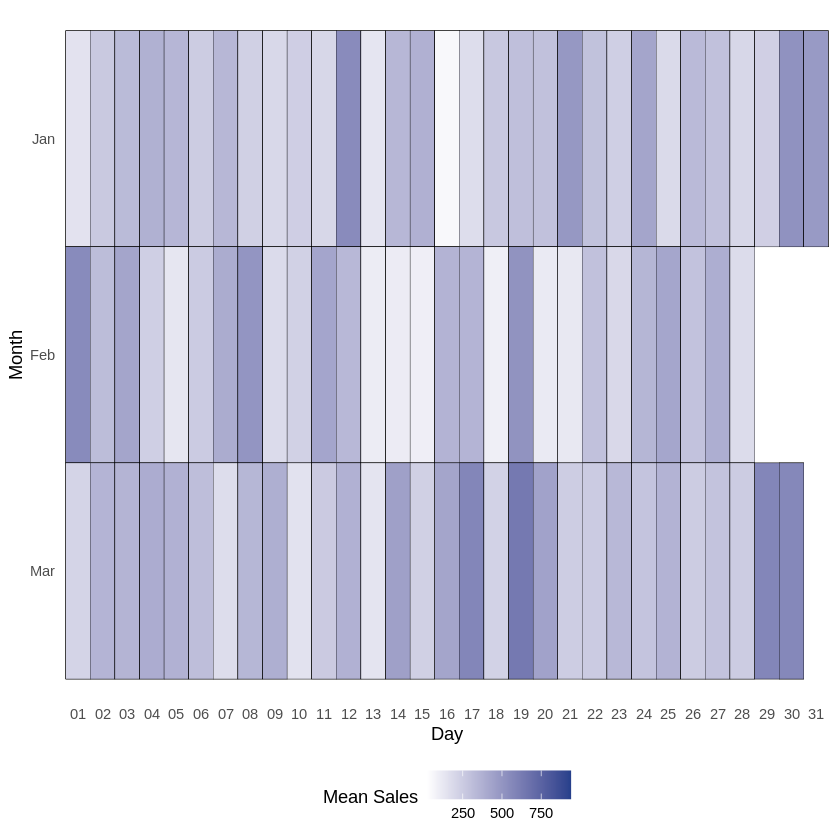

In [ ]:
q4_daily_data %>%
  ggplot(aes(x=Day, y=Month, fill=mean_sales)) +
  geom_tile(color="black") +
  scale_fill_gradient(name="Mean Sales",
                      low="white", high="royalblue4") +
  theme(legend.position = "bottom",
        panel.background=element_rect(fill="white"),
        panel.grid=element_blank(),
        axis.ticks = element_blank()) +
  scale_y_discrete(limits=rev,
labels=c("Mar", "Feb", "Jan"))
  # scale_y_reverse() # for the continuous axis

In [ ]:
ggsave("calendar_heatmap.png", width=6, height=2)

## Try It Yourself

Improve the charts above, and submit that improved chart.

## PLOTLY

In [ ]:
install.packages('plotly')
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [ ]:
fig <- plot_ly(q4_data, x = ~Week, y = ~mean_sales, color=~Payment, type = 'scatter', mode = 'lines')

In [ ]:
library(quantmod)

getSymbols("AAPL",src='yahoo')
df <- data.frame(Date=index(AAPL),coredata(AAPL))
df <- tail(df, 30)

fig <- df %>% plot_ly(x = ~Date, type="candlestick",
          open = ~AAPL.Open, close = ~AAPL.Close,
          high = ~AAPL.High, low = ~AAPL.Low) 
fig <- fig %>% layout(title = "Basic Candlestick Chart")

fig